# *Lab 1: Exploratory Data Analysis*
Automotive Sales Dataset


In [2]:
#Import the Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#Loading the file
df = pd.read_csv("https://raw.githubusercontent.com/ncastellano2320/Machine-Learning-in-Python/86d705d3789e7cbfeb3ecabcbd34709c116b456c/Lab1_ExploringTableData/Auto%20Sales%20data.csv?token=GHSAT0AAAAAACNGPIZJTKC4KS2NBQD6INVAZN5MMQQ", parse_dates=['ORDERDATE'], dayfirst=True)

#Replace the deal size to represent small, medium, and large with "1", "2" or "3" respectively. 
df.DEALSIZE.replace(to_replace = ['Small', 'Medium', 'Large'],
                 value = range(1,4), inplace = True)

#Drop unnecessary data
df = df.drop(['PHONE','CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'ADDRESSLINE1', 'POSTALCODE', 'STATUS', 'ORDERLINENUMBER', 'DAYS_SINCE_LASTORDER', 'ORDERNUMBER', 'PRODUCTCODE'], axis=1)

#Splitting the ORDERDATE column into three separate columns: year, month, and day
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month
df['DAY'] = df['ORDERDATE'].dt.day

#Dropping the original ORDERDATE column
df = df.drop(['ORDERDATE'], axis=1)

# Function to map month to quarter
def month_to_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

# Map month to quarter and create a new 'Quarter' column
df['QUARTER'] = df['MONTH'].apply(month_to_quarter)


df.head()

,QUANTITYORDERED,PRICEEACH,SALES,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,YEAR,MONTH,DAY,QUARTER
0,30,95.70,2871.00,Motorcycles,95,Land of Toys Inc.,NYC,USA,1,2018,2,24,Q1
1,34,81.35,2765.90,Motorcycles,95,Reims Collectables,Reims,France,1,2018,5,7,Q2
2,41,94.74,3884.34,Motorcycles,95,Lyon Souveniers,Paris,France,2,2018,7,1,Q3
3,45,83.26,3746.70,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,2,2018,8,25,Q3
4,36,96.66,3479.76,Motorcycles,95,Technics Stores Inc.,Burlingame,USA,2,2018,10,28,Q4


# *Data Visualization* 

Numerical Features of the dataset 
- Removing 'ORDERNUMBER' column from the dataset since it is not relevant.

Categorical Features of the dataset
- Removing 'PHONE', 'ADDRESSLINE1', 'CONTACTLASTNAME' , 'CONTACTFIRSTNAME' columns from the dataset since they are not needed for analysis.

Description of the QUANTITYORDERED
-------------------------------------------------------------------------------------------------------------------------------------------------
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64


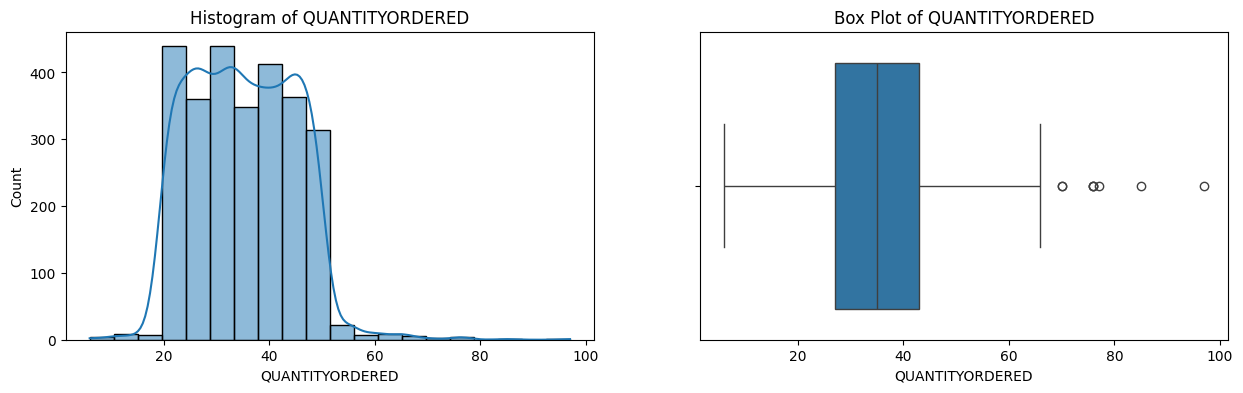

-------------------------------------------------------------------------------------------------------------------------------------------------


In [4]:
# Description and Visualization of 'QUANTITYORDERED'
print("Description of the QUANTITYORDERED")
print("-" * 145)
print(df['QUANTITYORDERED'].describe())
fig, axes = plt.subplots(1,2,figsize=(15,4))

# Histogram and KDE Plot 
sns.histplot(df['QUANTITYORDERED'],bins=20,kde=True,ax=axes[0])
axes[0].set_title("Histogram of QUANTITYORDERED")

# Box Plot 
sns.boxplot(x=df['QUANTITYORDERED'],ax=axes[1])
axes[1].set_title("Box Plot of QUANTITYORDERED")

plt.show()
print("-" * 145)

Description of the SALES
-------------------------------------------------------------------------------------------------------------------------------------------------
count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64


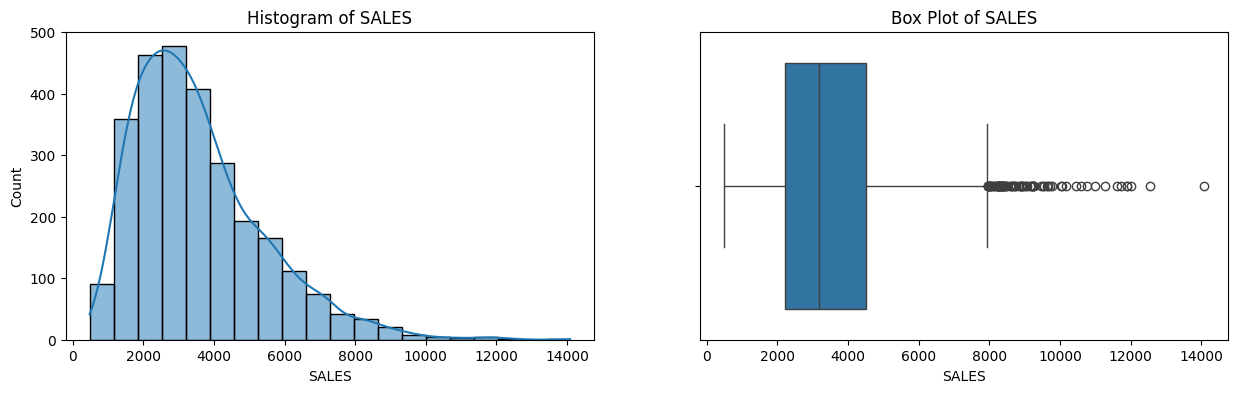

-------------------------------------------------------------------------------------------------------------------------------------------------


In [5]:
# Description and Visualization of 'SALES'
print("Description of the SALES")
print("-" * 145)
print(df['SALES'].describe())
fig, axes = plt.subplots(1,2,figsize=(15,4))

# Histogram and KDE Plot 
sns.histplot(df['SALES'],bins=20,kde=True,ax=axes[0])
axes[0].set_title("Histogram of SALES")

# Box Plot 
sns.boxplot(x=df['SALES'],ax=axes[1])
axes[1].set_title("Box Plot of SALES")

plt.show()
print("-" * 145)

Description of the PRICEEACH
-------------------------------------------------------------------------------------------------------------------------------------------------
count    2747.000000
mean      101.098952
std        42.042549
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64


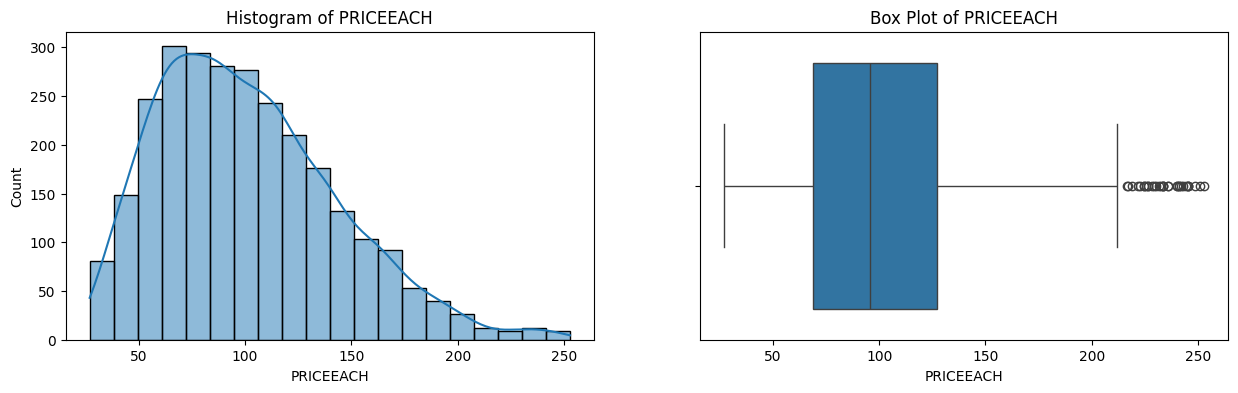

-------------------------------------------------------------------------------------------------------------------------------------------------


In [6]:
# Description and Visualization of 'PRICEEACH'
print("Description of the PRICEEACH")
print("-" * 145)
print(df['PRICEEACH'].describe())
fig, axes = plt.subplots(1,2,figsize=(15,4))

# Histogram and KDE Plot 
sns.histplot(df['PRICEEACH'],bins=20,kde=True,ax=axes[0])
axes[0].set_title("Histogram of PRICEEACH")

# Box Plot 
sns.boxplot(x=df['PRICEEACH'],ax=axes[1])
axes[1].set_title("Box Plot of PRICEEACH")

plt.show()
print("-" * 145)

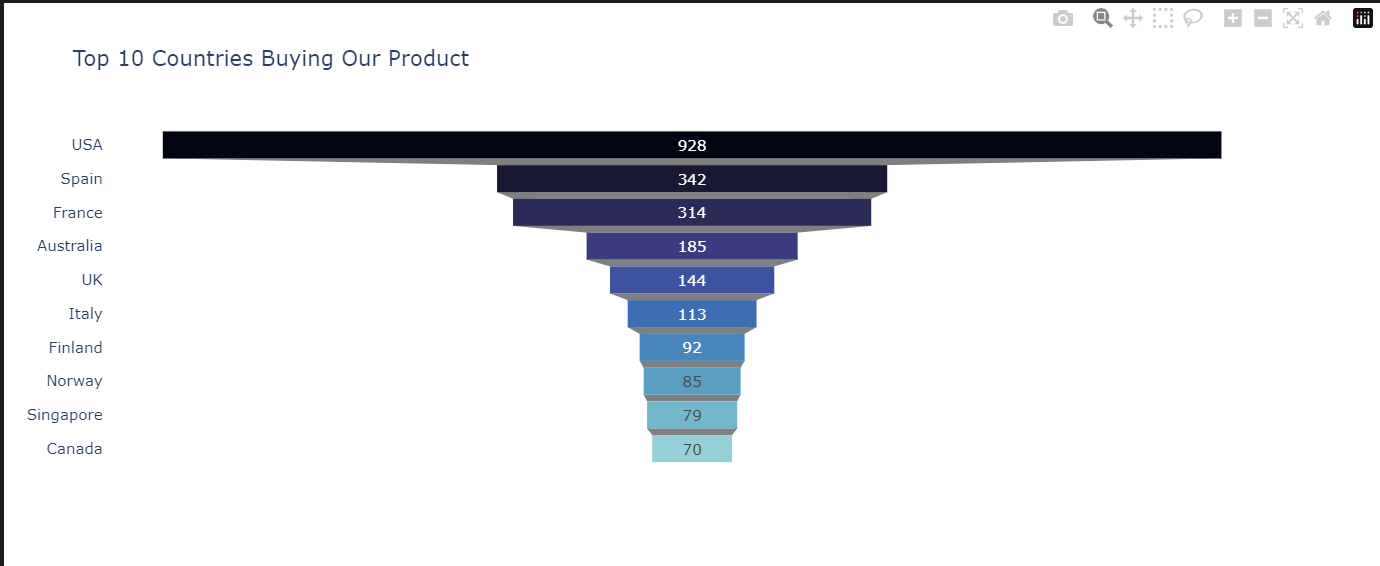

In [7]:
# Top 10 Countries Buying Our Product 
country_counts = df['COUNTRY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=country_counts.index, x=country_counts.values, textinfo='value', marker={'color': px.colors.sequential.ice}))
fig.update_layout(title_text="Top 10 Countries Buying Our Product", template='plotly_white')
fig.show()
Image(filename="C:\Machine Learning in Python\Machine-Learning-in-Python-GitHub\Lab1_ExploringTableData\Screenshots\Top10_Countires.png")

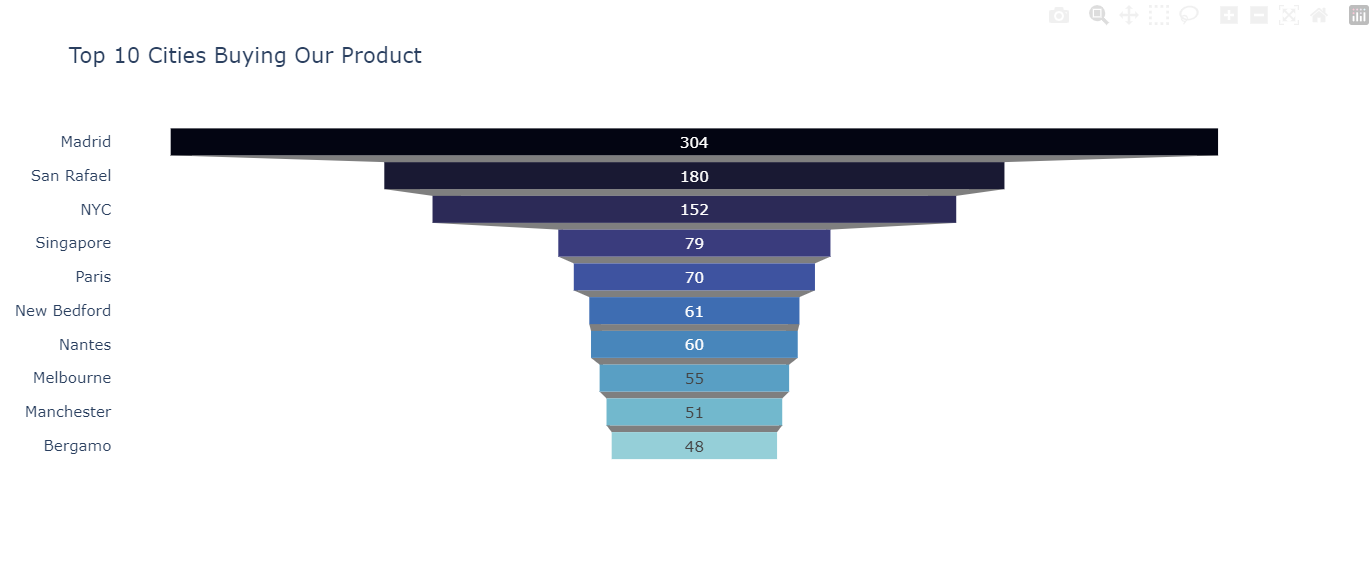

In [8]:
# Top 10 Cities Buying Our Product
city_counts = df['CITY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=city_counts.index, x=city_counts.values, textinfo='value',marker={'color': px.colors.sequential.ice}))
fig.update_layout(title_text="Top 10 Cities Buying Our Product", template='plotly_white')
fig.show()
Image(filename="C:\Machine Learning in Python\Machine-Learning-in-Python-GitHub\Lab1_ExploringTableData\Screenshots\Top10_Cities.png")

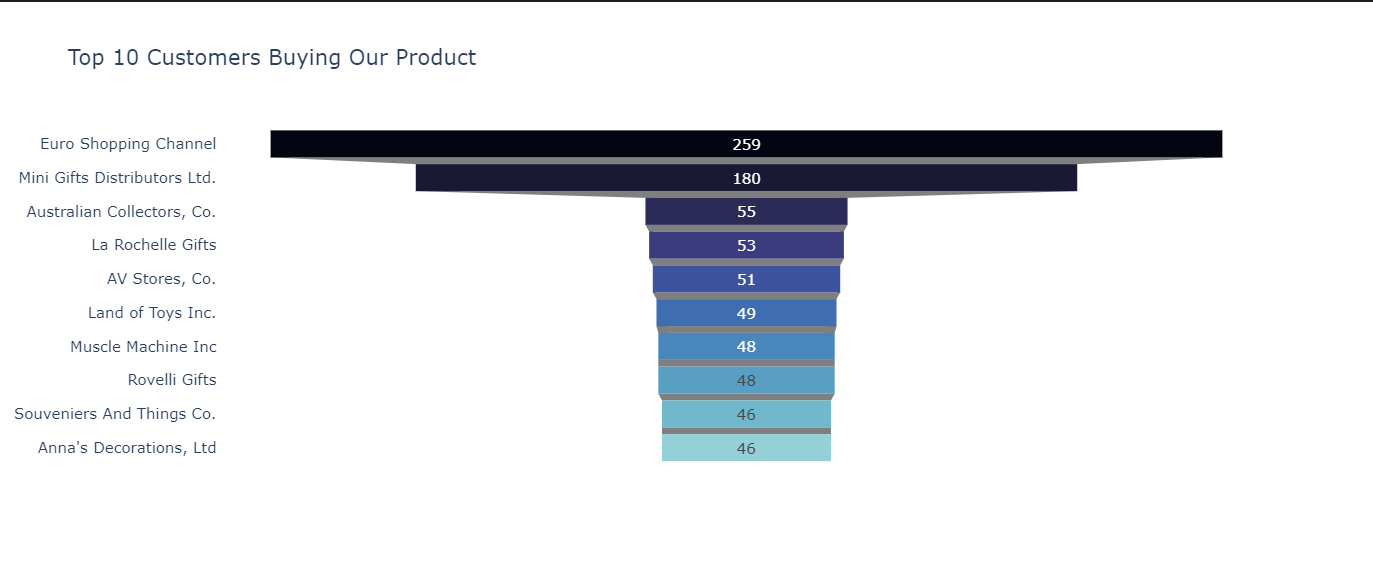

In [9]:
# Top 10 Customers Buying Our Product
top10_customers = df.sort_values(by = "SALES", ascending = False).head(10)
top10_customers = df['CUSTOMERNAME'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=top10_customers.index, x=top10_customers.values, textinfo='value', marker={'color': px.colors.sequential.ice}))
fig.update_layout(title_text="Top 10 Customers Buying Our Product", template='plotly_white')
fig.show()
Image(filename="C:\Machine Learning in Python\Machine-Learning-in-Python-GitHub\Lab1_ExploringTableData\Screenshots\Top10_Customers.png")

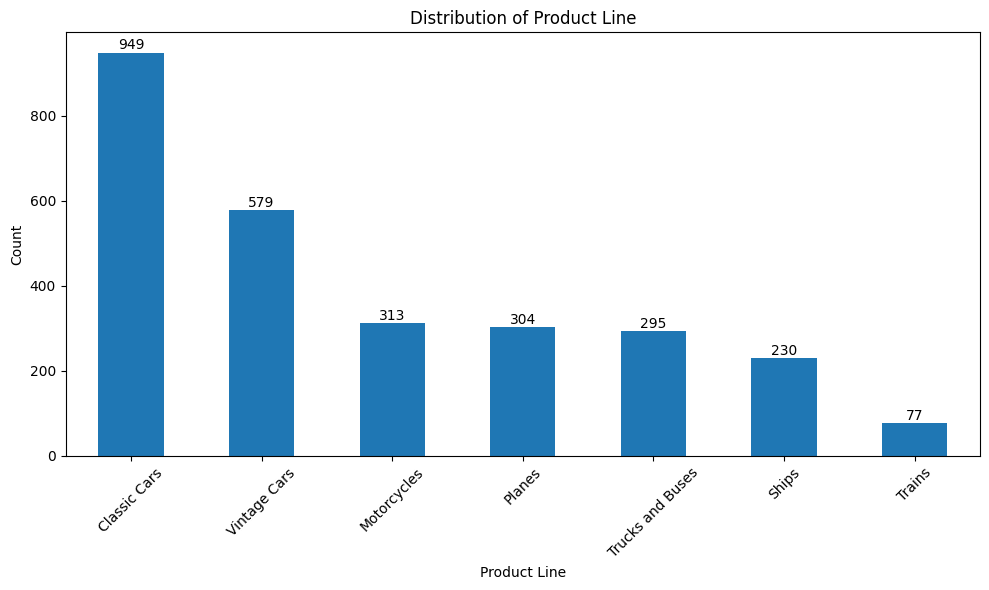

In [10]:
# Distributution of Product Line 
product_line_counts = df['PRODUCTLINE'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
bar_plot = product_line_counts.plot(kind='bar')

# Add counts on top of each bar
for i, count in enumerate(product_line_counts):
    bar_plot.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.xlabel('Product Line')
plt.ylabel('Count')
plt.title('Distribution of Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP', 'DEALSIZE'], dtype='object') 5


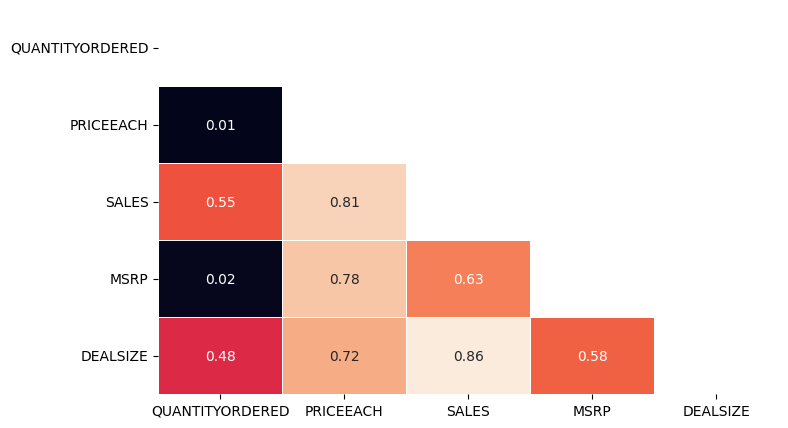

In [11]:
# Correlation Graph for Numerical Features of the dataset
df_num = df.select_dtypes(include=['float64', 'int64'])
print(df_num.columns, len(list(df_num.columns.values)))
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
fig = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask, cbar=None, linewidth=0.5)
plt.show()

In [12]:
# Count occurrences of each year
year_counts = df['YEAR'].value_counts()

print("Year counts:")
print(year_counts)

Year counts:
YEAR
2019    1329
2018     953
2020     465
Name: count, dtype: int64


In [13]:
# Count occurrences of each month
year_counts = df['MONTH'].value_counts()

print("Month counts:")
print(year_counts)

Month counts:
MONTH
11    589
10    283
5     252
1     221
2     211
3     206
8     191
4     178
12    173
9     171
7     141
6     131
Name: count, dtype: int64


In [14]:
yearly_sales = df.groupby('YEAR')['SALES'].sum()

print("Yearly sales:")
print(yearly_sales)

Yearly sales:
YEAR
2018    3353014.06
2019    4669924.56
2020    1737283.09
Name: SALES, dtype: float64


In [15]:
yearly_sales = df.groupby('MONTH')['SALES'].sum()

print("Monthly sales:")
print(yearly_sales)

Monthly sales:
MONTH
1      761985.12
2      756238.28
3      735805.81
4      669390.96
5      923972.56
6      454756.78
7      514875.97
8      659310.57
9      584724.27
10    1001377.20
11    2088536.95
12     609247.24
Name: SALES, dtype: float64


In [16]:
quarter_sales = df.groupby('QUARTER')['SALES'].sum()
print("Quarterly sales:")
print(quarter_sales)

Quarterly sales:
QUARTER
Q1    2254029.21
Q2    2048120.30
Q3    1758910.81
Q4    3699161.39
Name: SALES, dtype: float64


In [17]:
productline_sales = df.groupby('PRODUCTLINE')['SALES'].sum()
print("Product Line Sales:")
print(productline_sales)

Product Line Sales:
PRODUCTLINE
Classic Cars        3842868.54
Motorcycles         1103512.19
Planes               969323.42
Ships                700039.22
Trains               226243.47
Trucks and Buses    1111559.19
Vintage Cars        1806675.68
Name: SALES, dtype: float64


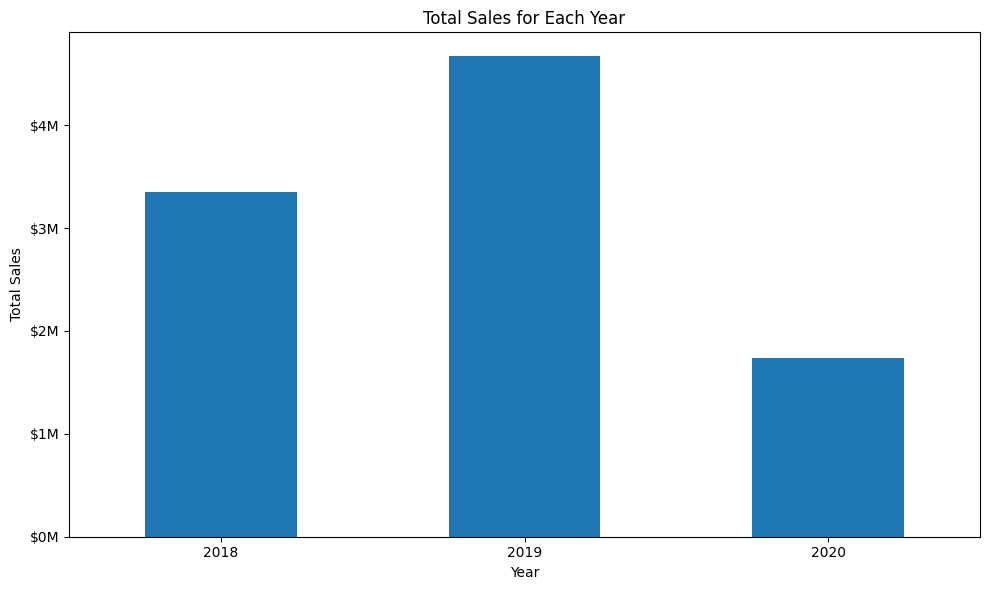

In [18]:
# Sales by Year
from matplotlib.ticker import FuncFormatter

# Assuming df is your DataFrame containing the 'YEAR' and 'SALES' columns

# Group the DataFrame by 'YEAR' and sum up the 'SALES' for each year
yearly_sales = df.groupby('YEAR')['SALES'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales for Each Year')

# Format y-axis ticks to display values in millions
formatter = FuncFormatter(lambda x, _: '${:,.0f}M'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

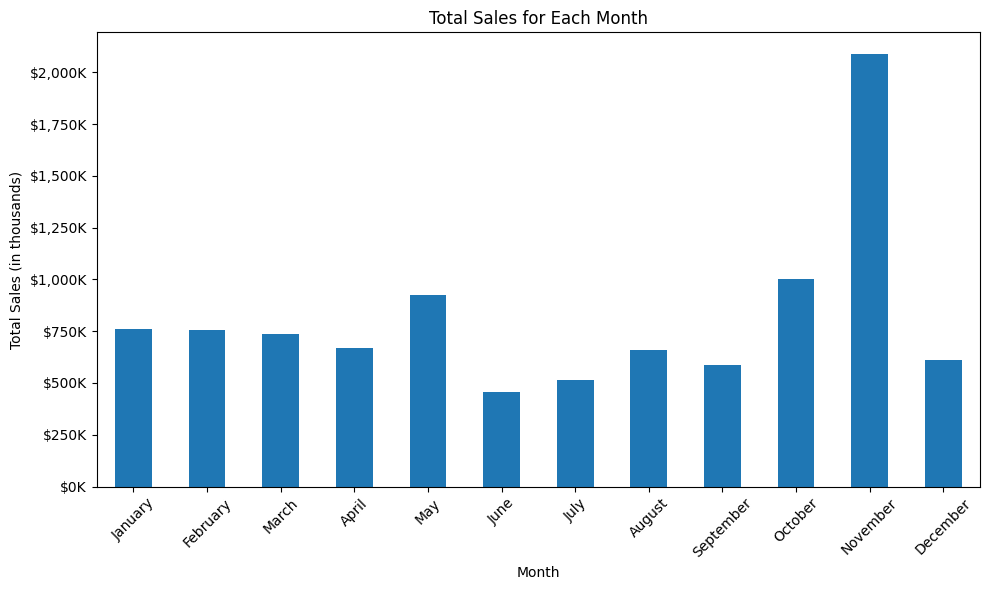

In [19]:
# Sales by Month 
# Define month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Group the DataFrame by 'Month' and sum up the 'SALES' for each month
monthly_sales = df.groupby('MONTH')['SALES'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Sales (in thousands)')  # Updated y-axis label

# Format y-axis ticks to display values in hundreds of thousands
formatter = FuncFormatter(lambda x, _: '${:,.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Total Sales for Each Month')
plt.xticks(range(12), [month_names[month] for month in range(1, 13)], rotation=45)

plt.tight_layout()
plt.show()

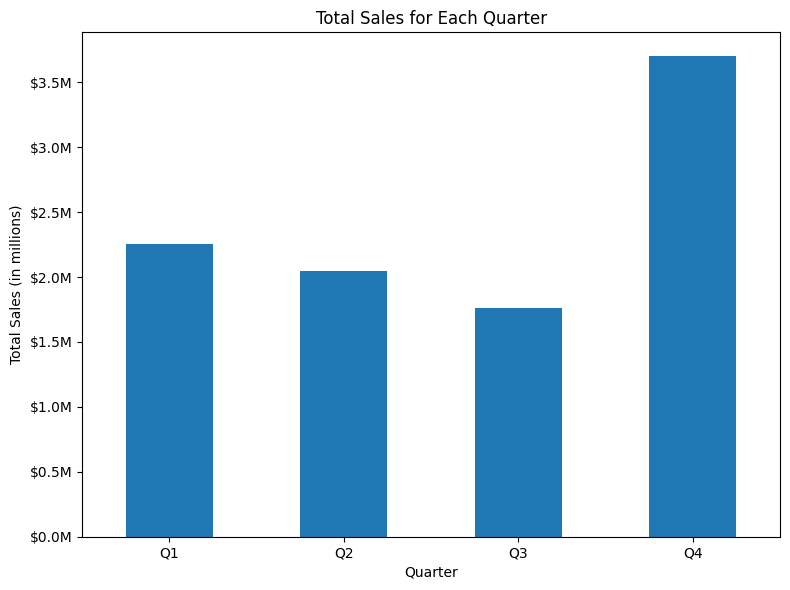

In [20]:
# Sales by Quarter
# Group the DataFrame by 'Quarter' and sum up the 'SALES' for each quarter
quarterly_sales = df.groupby('QUARTER')['SALES'].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
quarterly_sales.plot(kind='bar')
plt.xlabel('Quarter')
plt.ylabel('Total Sales (in millions)')  # Updated y-axis label

# Format y-axis ticks to display values in millions
formatter = FuncFormatter(lambda x, _: '${:,.1f}M'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Total Sales for Each Quarter')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

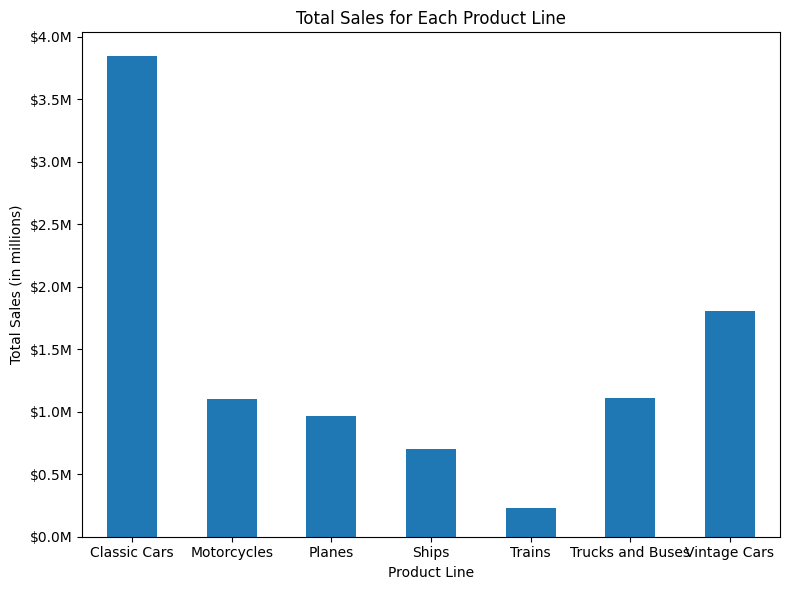

In [22]:
# Sales by Product Line
productline_sales = df.groupby('PRODUCTLINE')['SALES'].sum()

# Plot the bar chart
plt.figure(figsize=(8, 6))
productline_sales.plot(kind='bar')
plt.xlabel('Product Line')
plt.ylabel('Total Sales (in millions)')  # Updated y-axis label

# Format y-axis ticks to display values in millions
formatter = FuncFormatter(lambda x, _: '${:,.1f}M'.format(x / 1000000))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Total Sales for Each Product Line')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

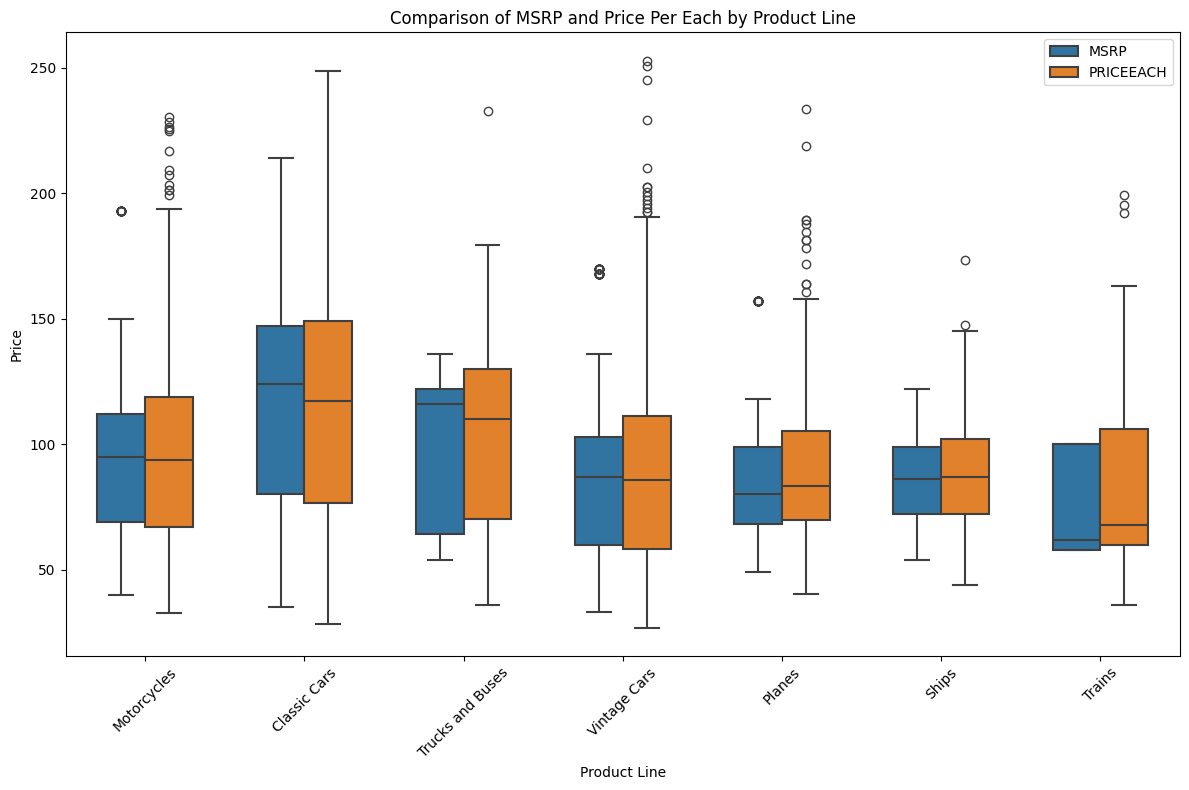

In [24]:
# Price Each vs. MSRP by Product Line
# Melt the DataFrame to have 'MSRP' and 'Price Per Each' in the same column with a new 'Type' column
melted_df = pd.melt(df, id_vars=['PRODUCTLINE'], value_vars=['MSRP', 'PRICEEACH'], var_name='Type', value_name='Price')

# Create a boxplot comparison per product line
plt.figure(figsize=(12, 8))
sns.boxplot(data=melted_df, x='PRODUCTLINE', y='Price', hue='Type', width=0.6, linewidth=1.5)

# Add labels and title
plt.xlabel('Product Line')
plt.ylabel('Price')
plt.title('Comparison of MSRP and Price Per Each by Product Line')

# Adjust legend position
plt.legend(loc='upper right')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()